In [85]:
import  numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [86]:
h=1
sd=1
n=50

def gen_data(n,h,sd1,sd2):
    x1=ss.norm.rvs(-h,sd1,n)
    y1=ss.norm.rvs(0,sd1,n)

    x2=ss.norm.rvs(h,sd2,n)
    y2=ss.norm.rvs(0,sd2,n)
    return (x1,x2,y1,y2)


In [87]:
(x1,x2,y1,y2)=gen_data(50,1,1,2)

In [88]:
(x1,x2,y1,y2)=gen_data(1000,1.5,1,1.5)

In [89]:
def plot_data(x1,x2,y1,y2):
    plt.figure()
    plt.plot(x1,y1,"o",ms=2)
    plt.plot(x2,y2,"o",ms=2)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_1$")
    

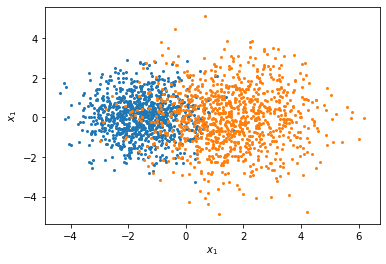

In [90]:
plot_data(x1,x2,y1,y2)

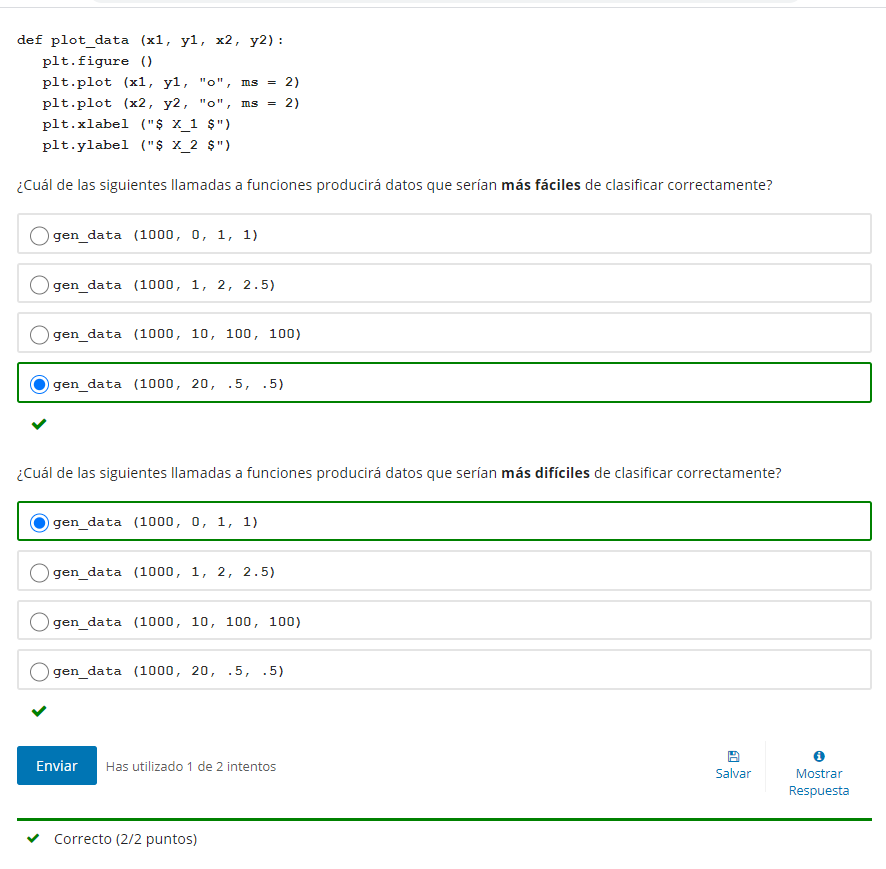

In [91]:
#(x1,x2,y1,y2)=gen_data(1000, 0, 1, 1)

In [92]:
#plot_data(x1,x2,y1,y2)

In [93]:
## logistic Regression

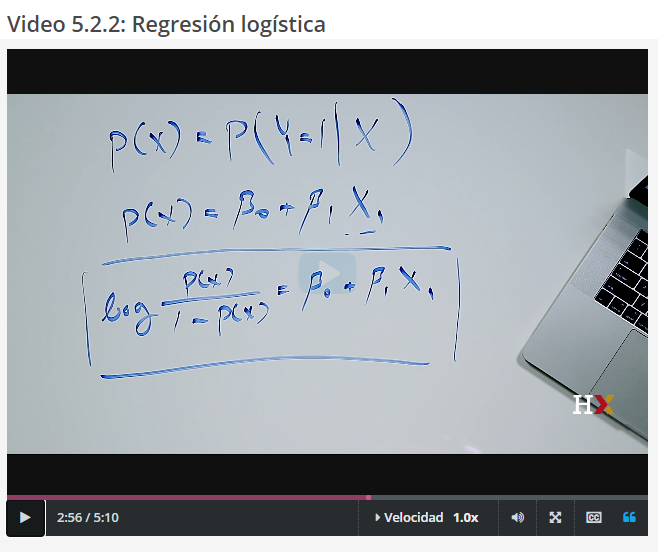

In [94]:
def prob_to_odds(p):
    if p <= 0 or p >= 1:
        print("Probabilities must be between 0 and 1.")
    return p / (1-p)

In [95]:
prob_to_odds(0.8)

4.000000000000001

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
clf=LogisticRegression()

In [98]:
# esto recibe dos valores
# x: representan las observaciones([1,2,3,3..],[2,3,4,5..])
# y: representan las clases ([1,1,1,1,1...,2,2,2,2])

In [99]:
X=np.vstack((np.vstack((x1,x2)).T,np.vstack((x2,y2)).T))

In [100]:
X.shape

(2000, 2)

In [101]:
n=1000
Y=np.hstack((np.repeat(1,n),np.repeat(2,n)))
Y.shape

(2000,)

In [102]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.5,random_state=1)

In [103]:
clf.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
clf.score(X_test,y_test)

0.912

In [106]:
clf.predict_proba(np.array([-2,0]).reshape(1,-1))

array([[0.95800303, 0.04199697]])

In [107]:
clf.predict(np.array([-2,0]).reshape(1,-1))

array([1])

In [108]:
###### Computing Predictive Probabilities Across the Grid --- Calcular probabilidades predictivas a través de la red

In [109]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

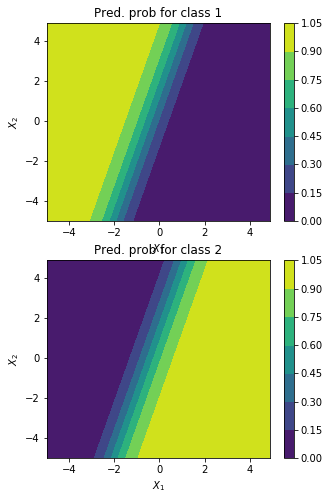

In [110]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");